In [124]:
import pandas as pd

df = pd.read_csv('data/FireStatLA/UCLA Heat Days - Daily Incident Summary.csv')
df.head()

,Incident Date,FSDistrict,IncidentCategory,IncidentCount
0,01/01/2018,1,AUTOMOBILE,1
1,01/01/2018,1,BURNS,1
2,01/01/2018,1,CHEST DISCOMFORT/HEART PROBLEM,1
3,01/01/2018,1,DIABETIC,1
4,01/01/2018,1,FALL,2


In [125]:
df.tail()

,Incident Date,FSDistrict,IncidentCategory,IncidentCount
1475661,12/31/2022,109,TRAFFIC,1
1475662,12/31/2022,112,ASSAULT,1
1475663,12/31/2022,112,CHEST DISCOMFORT/HEART PROBLEM,1
1475664,12/31/2022,112,FALL,3
1475665,12/31/2022,112,O.D./POISONING,1


In [126]:
# i deleted the column FSDistrict in the beggining just to not be displayed in the result , then i applied the groupby function
# on the columns date and incident category to show for each day which accident category occured

res = df.drop('FSDistrict', axis=1).groupby(["Incident Date",'IncidentCategory']).sum()

In [127]:
res.head()

IncidentCount
Incident Date IncidentCategory                   
01/01/2018    ABDOMINAL                        47
              ALLERGY/ENVENOMATION              8
              ANIMAL BITE                       2
              ASSAULT                          86
              AUTOMATIC ALARM                  48

In [128]:
# i did the same here i deleted the column incidentcount to show only the date and incident category
res.drop("IncidentCount", axis=1).head(50)

Empty DataFrame
Columns: []
Index: [(01/01/2018, ABDOMINAL), (01/01/2018, ALLERGY/ENVENOMATION), (01/01/2018, ANIMAL BITE), (01/01/2018, ASSAULT), (01/01/2018, AUTOMATIC ALARM), (01/01/2018, AUTOMOBILE), (01/01/2018, BELLS RINGING), (01/01/2018, BLEEDING (NON-TRAUMATIC)), (01/01/2018, BREATHING DIFFICULTY), (01/01/2018, BRUSH), (01/01/2018, BURNS), (01/01/2018, CARDIAC/RESP. ARREST), (01/01/2018, CHEMICAL), (01/01/2018, CHEST DISCOMFORT/HEART PROBLEM), (01/01/2018, CHOKING), (01/01/2018, DIABETIC), (01/01/2018, ELECTRICAL), (01/01/2018, ELEVATOR), (01/01/2018, FALL), (01/01/2018, GRASS), (01/01/2018, HEADACHE), (01/01/2018, INJURY), (01/01/2018, INTERFACILITY TRANSFER), (01/01/2018, LOCKOUT), (01/01/2018, O.D./POISONING), (01/01/2018, OB/GYN), (01/01/2018, OVEN), (01/01/2018, PEDIATRICS), (01/01/2018, POLE), (01/01/2018, PSYCH/SA/EMOTIONAL), (01/01/2018, RUBBISH), (01/01/2018, SEIZURE), (01/01/2018, SHOOTING), (01/01/2018, SICK), (01/01/2018, SMOKE), (01/01/2018, SMOKE DETECTOR), (01/01/2018, STABBING), (01/01/2018, STROKE), (01/01/2018, STRUCTURE), (01/01/2018, STRUCTURE-AA), (01/01/2018, TOXIC), (01/01/2018, TRAFFIC), (01/01/2018, TREE), (01/01/2018, UNCONSCIOUS/FAINTING), (01/01/2018, UNKNOWN PROBLEM), (01/01/2018, VEHICULAR), (01/01/2018, WATER-RELATED), (01/01/2019, ABDOMINAL), (01/01/2019, ALLERGY/ENVENOMATION), (01/01/2019, ANIMAL BITE)]

In [129]:
# 2- groupby on each unique day by Fire district
res2 = df.groupby(["Incident Date","FSDistrict",'IncidentCategory']).sum()
res2.head(30)

IncidentCount
Incident Date FSDistrict IncidentCategory                             
01/01/2018    1          AUTOMOBILE                                  1
                         BURNS                                       1
                         CHEST DISCOMFORT/HEART PROBLEM              1
                         DIABETIC                                    1
                         FALL                                        2
                         INTERFACILITY TRANSFER                      1
                         O.D./POISONING                              1
                         RUBBISH                                     1
                         TRAFFIC                                     1
                         TREE                                        1
                         UNCONSCIOUS/FAINTING                        1
                         UNKNOWN PROBLEM                             1
              2          CHEST DISCOMFORT/HEART PROBLEM              1
                         DIABETIC                                    1
                         FALL                                        1
                         PEDIATRICS                                  1
                         RUBBISH                                     2
                         SICK                                        3
                         STRUCTURE                                   1
                         UNKNOWN PROBLEM                             1
                         WATER-RELATED                               1
              3          ABDOMINAL                                   1
                         ASSAULT                                     2
                         AUTOMATIC ALARM                             3
                         CHEMICAL                                    1
                         FALL                                        1
                         O.D./POISONING                              1
                         RUBBISH                                     1
                         SEIZURE                                     1
                         STABBING                                    1

In [130]:
# 3 - sum up all the incidents (regardless of the category) per day for each FS district 
res3 = df.groupby(["Incident Date","FSDistrict"]).sum().rename({'IncidentCount': 'total incident count'}, axis=1)
res3

/tmp/ipykernel_129/1759692214.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res3 = df.groupby(["Incident Date","FSDistrict"]).sum().rename({'IncidentCount': 'total incident count'}, axis=1)


total incident count
Incident Date FSDistrict                      
01/01/2018    1                             13
              2                             12
              3                             16
              4                             13
              5                              8
...                                        ...
12/31/2022    105                           14
              106                            6
              107                            8
              109                            3
              112                            6

[181454 rows x 1 columns]

In [131]:
# convert the column incident date from type "str" to "datetime" in order to get only the year value and create
# a new column for the year value
df['Incident Year'] = pd.DatetimeIndex(df['Incident Date']).year

In [132]:
# same as bthe previous question , only this time we grouby the year and not day , thus the new column 'Incident Year'
res4 = df.groupby(["Incident Year","FSDistrict"]).sum().rename({'IncidentCount': 'total incident per year'}, axis=1)
res4

/tmp/ipykernel_129/1564999718.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  res4 = df.groupby(["Incident Year","FSDistrict"]).sum().rename({'IncidentCount': 'total incident per year'}, axis=1)


total incident per year
Incident Year FSDistrict                         
2018          1                              3462
              2                              4888
              3                              5699
              4                              7577
              5                              2722
...                                           ...
2022          108                             330
              109                             790
              110                              19
              111                              48
              112                            1927

[520 rows x 1 columns]

In [133]:
res5= res4.sort_values(['Incident Year', 'total incident per year'], ascending=[True, False])
res5.head(n=10)

total incident per year
Incident Year FSDistrict                         
2018          9                             18900
              64                            13536
              66                            11459
              57                            11283
              11                             9916
              46                             9669
              33                             8635
              51                             8100
              89                             7752
              27                             7613

In [134]:
res5.iloc[103:114,:]

total incident per year
Incident Year FSDistrict                         
2018          110                              23
2019          9                             20263
              64                            13602
              57                            11772
              66                            11666
              11                            10656
              46                             9472
              33                             9048
              51                             8576
              89                             8104
              27                             7976

In [135]:
res5.iloc[207:218,:]

total incident per year
Incident Year FSDistrict                         
2019          110                              28
2020          9                             17385
              64                            14251
              57                            11557
              66                            11423
              11                            11194
              46                             9820
              33                             9711
              89                             8201
              39                             7114
              98                             6987

In [136]:
res5.iloc[311:323,:]

total incident per year
Incident Year FSDistrict                         
2020          110                              18
2021          9                             18574
              64                            14190
              66                            12011
              11                            11967
              57                            11727
              46                            10122
              33                             9666
              89                             8609
              27                             8105
              10                             7440
              39                             7405

In [137]:
res5.iloc[415:426,:]

total incident per year
Incident Year FSDistrict                         
2021          110                              29
2022          9                             20491
              64                            14695
              11                            14225
              66                            12101
              57                            12045
              46                            10143
              33                             9857
              89                             9556
              27                             8508
              4                              8411

In [138]:
#  Aggregate the total incidents per year (regardless of what district they occured in)
# reset_index() function is just to keep the same column names, because groupby don't keep the name of the column that you apply the groupby function on to
res6 = df.groupby(["Incident Year"])['IncidentCount'].sum().reset_index()
res6

,Incident Year,IncidentCount
0,2018,430095
1,2019,437636
2,2020,421606
3,2021,450359
4,2022,480356


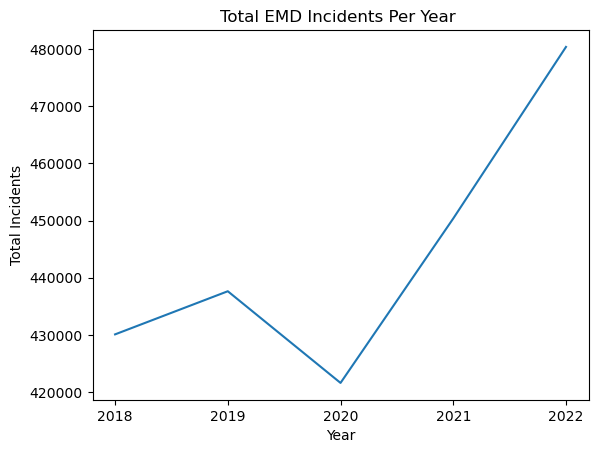

<Figure size 640x480 with 0 Axes>

In [148]:
import matplotlib.pyplot as plt
pd.to_datetime(res6['Incident Year'], format='%Y')
plt.plot(res6['Incident Year'],res6['IncidentCount'])
plt.xticks(res6['Incident Year'])
plt.title("Total EMD Incidents Per Year ")
plt.xlabel("Year")
plt.ylabel("Total Incidents")
plt.show()
plt.savefig('IncidentsPerYear.png')

In [145]:
top10 = pd.read_csv('data/FireStatLA/Top10FSD_peryear - Sheet1.csv')
top10.head()

,Year,FS District,Total Incidents
0,2018,9,18900
1,2018,64,13536
2,2018,66,11459
3,2018,57,11283
4,2018,11,9916


In [147]:
#used this code to identify which fire districts consistently appeared in the top 10
top10['FS District'].value_counts()

9     5
64    5
66    5
57    5
11    5
46    5
33    5
89    5
27    4
51    2
39    1
98    1
10    1
4     1
Name: FS District, dtype: int64